reference https://www.kaggle.com/gaoyuan19930220/xgboost

In [69]:
import pandas as pd
import os
import xgboost as xgb
import operator
from matplotlib import pylab as plt
from sklearn import preprocessing

In [70]:
def preproceed(dataframe):
    # 欠損値の処理
    dataframe.replace({'Nan':pd.np.nan,'nan':pd.np.nan},inplace=True)
#     dataframe.fillna(dataframe.mean(numeric_only=True),inplace=True)
    dataframe['Fare'].fillna(dataframe['Fare'].mean(),inplace=True)
    dataframe['Embarked'].fillna(dataframe['Embarked'].mode().loc[0],inplace=True)

    #いらない列(Cabin,Name,PassengerId,Ticket)の削除
    dataframe.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
    
    #家族と同乗しているかどうかの属性を追加
    dataframe['IsFamily'] = (dataframe['SibSp'] + dataframe['Parch']) != 0
    
    #質的変数をダミー変数に
    dataframe['isPclass1'] = dataframe['Pclass'] == 1
    dataframe['isPclass2'] = dataframe['Pclass'] == 2
    dataframe['isPclass2'] = dataframe['Pclass'] == 3
    dataframe['isEmbarkedS'] = dataframe['Embarked'] == 'S'
    dataframe['isEmbarkedC'] = dataframe['Embarked'] == 'C'
    dataframe['isEmbarkedQ'] = dataframe['Embarked'] == 'Q'
    
    
    #質的変数を変換'
    dataframe['Sex'] = dataframe['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    dataframe['Embarked'] = dataframe['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).astype('int')

In [71]:
#csvデータの呼び出し場所
loadpath = "../input/"
#csvデータの保存場所
savepath = "../output/"

In [72]:
df = pd.read_csv(loadpath + "train.csv")
df_test = pd.read_csv(loadpath + "test.csv")

df.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

#trainY = df.Survived
#df.drop('Survived', axis=1, inplace=True)

train_index = df.index
test_index = df_test.index

preproceed(df)
preproceed(df_test)

In [73]:
train = df.drop('Survived', axis=1)
labels = df.Survived
test = df_test
#データを分割
#(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

In [74]:
# train a xgboost classifier
params = {"num_class": 2}
train_xgb = xgb.DMatrix(train, labels)
test_xgb  = xgb.DMatrix(test)
trainRound = 100
gbm = xgb.train(params, train_xgb, trainRound)
pred = gbm.predict(test_xgb)
pred = pred.astype('int')

[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /work

[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /work

[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:30:08] /work

<Figure size 432x288 with 0 Axes>

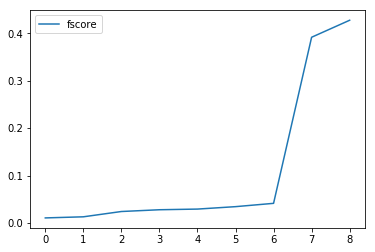

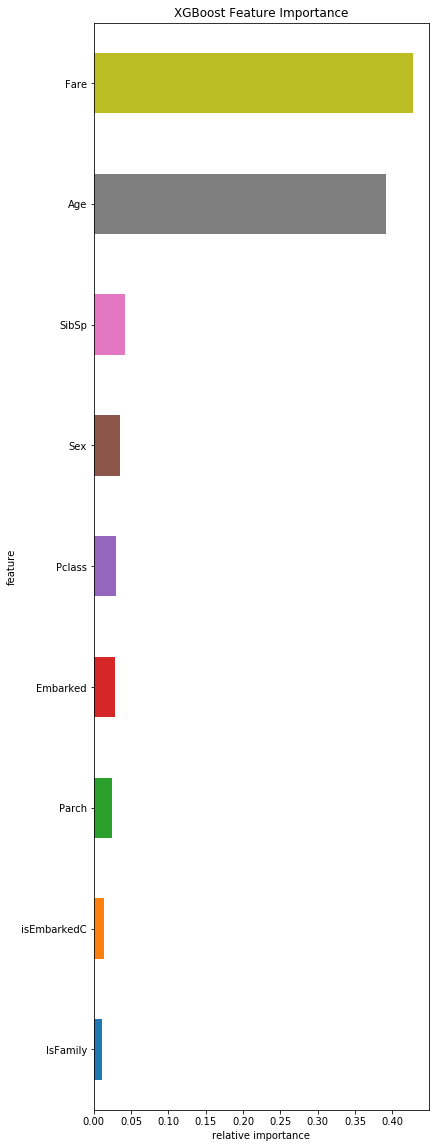

In [75]:
features = train.columns
# create a feature map
outfile = open('xgb.fmap', 'w')
i = 0
for feat in features:
    outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    i = i + 1
outfile.close()

# plot feature importance
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')



In [77]:
# create submission file
submission_result = pd.DataFrame({"Survived":pred},index=test.index)
submission_result.to_csv(savepath + 'submission_xgb.csv',index='False')